In [1]:
# Library import
import pandas as pd
import yaml
import requests
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
# Import parameters data
"""
Import the parameters of hospitalization and mortality by state using data from the CoronaCidades
"""

data_parameters = pd.read_csv("http://datasource.coronacidades.org/br/states/parameters")
data_parameters

,fatality_ratio,hospitalized_by_age_perc,i1_percentage,i2_percentage,i3_percentage,state_num_id,data_last_refreshed
0,0.004582,0.035272,0.964728,0.029190,0.006081,11,2021-01-31 04:09:07
1,0.003882,0.029194,0.970806,0.024160,0.005033,12,2021-01-31 04:09:07
2,0.003741,0.029431,0.970569,0.024356,0.005074,13,2021-01-31 04:09:07
3,0.003333,0.029069,0.970931,0.024057,0.005012,14,2021-01-31 04:09:07
4,0.004362,0.032281,0.967719,0.026715,0.005566,15,2021-01-31 04:09:07
5,0.003405,0.028235,0.971765,0.023367,0.004868,16,2021-01-31 04:09:07
6,0.005203,0.035553,0.964447,0.029423,0.006130,17,2021-01-31 04:09:07
7,0.005125,0.033957,0.966043,0.028102,0.005855,21,2021-01-31 04:09:07
8,0.006147,0.039047,0.960953,0.032315,0.006732,22,2021-01-31 04:09:07
9,0.006366,0.039715,0.960285,0.032867,0.006847,23,2021-01-31 04:09:07


In [3]:
# Import farolcovid data
"""
Imports FarolCovid data related to:

- Updated cases and deaths
- Notification rate and most recent estimated active cases
- Most recent contagion rate (Rt)
- Latest number of sick and ICU beds from CNES
"""

data_farol = pd.read_csv("http://datasource.coronacidades.org/br/states/farolcovid/main")
data_farol


,active_cases,author_number_beds,author_number_icu_beds,capacity_classification,confirmed_cases,control_classification,country_iso,country_name,daily_cases,daily_cases_growth,...,rt_low_95,rt_most_likely,rt_most_likely_growth,situation_classification,state_id,state_name,state_num_id,subnotification_rate,trust_classification,data_last_refreshed
0,46699.0,DataSUS,DataSUS,1,123957,2,BR,Brasil,757,estabilizando,...,1.07,1.20,estabilizando,3,RO,Rondônia,11,0.810466,3,2021-01-31 06:57:42
1,7191.0,DataSUS,DataSUS,2,48347,1,BR,Brasil,411,estabilizando,...,0.88,1.06,estabilizando,3,AC,Acre,12,0.675166,2,2021-01-31 06:57:42
2,518330.0,DataSUS,DataSUS,2,265994,2,BR,Brasil,4420,estabilizando,...,1.19,1.29,estabilizando,3,AM,Amazonas,13,0.962653,3,2021-01-31 06:57:42
3,13039.0,DataSUS,DataSUS,2,74115,1,BR,Brasil,206,crescendo,...,0.82,1.00,estabilizando,3,RR,Roraima,14,0.883040,3,2021-01-31 06:57:42
4,52095.0,DataSUS,DataSUS,2,329306,1,BR,Brasil,506,estabilizando,...,0.98,1.09,estabilizando,2,PA,Pará,15,0.777234,3,2021-01-31 06:57:42
5,17371.0,DataSUS,DataSUS,2,76884,1,BR,Brasil,196,estabilizando,...,0.89,1.04,estabilizando,3,AP,Amapá,16,0.761785,3,2021-01-31 06:57:42
6,13990.0,DataSUS,DataSUS,2,102108,1,BR,Brasil,442,estabilizando,...,0.95,1.09,estabilizando,2,TO,Tocantins,17,0.724740,3,2021-01-31 06:57:42
7,17529.0,DataSUS,DataSUS,2,207415,1,BR,Brasil,270,estabilizando,...,0.80,0.97,estabilizando,1,MA,Maranhão,21,0.895603,3,2021-01-31 06:57:42
8,17230.0,DataSUS,DataSUS,2,159023,1,BR,Brasil,439,estabilizando,...,0.90,1.03,estabilizando,2,PI,Piauí,22,0.606856,2,2021-01-31 06:57:42
9,39955.0,DataSUS,DataSUS,2,370300,1,BR,Brasil,1055,estabilizando,...,0.97,1.08,estabilizando,2,CE,Ceará,23,0.574024,1,2021-01-31 06:57:42


In [4]:
# Parameters config import
"""
Import the disease progression times fixed parameters from the literature
"""
url = "https://raw.githubusercontent.com/ImpulsoGov/farolcovid/stable/src/configs/config.yaml"
config = yaml.load(requests.get(url).text, Loader=yaml.FullLoader)
config = config["br"]["seir_parameters"]
config


{'asymptomatic_proportion': 0.3,
 'mild_duration': 6,
 'severe_duration': 6,
 'critical_duration': 8,
 'fatality_ratio': 0.02,
 'doubling_rate': 1.15,
 'incubation_period': 5,
 'i1_percentage': 0.855,
 'i2_percentage': 0.12,
 'i3_percentage': 0.025,
 'infected_health_care_proportion': 0.05,
 'hospitalized_by_age_perc': {'from_0_to_9': 2e-05,
  'from_10_to_19': 0.0004,
  'from_20_to_29': 0.011,
  'from_30_to_39': 0.034,
  'from_40_to_49': 0.043,
  'from_50_to_59': 0.082,
  'from_60_to_69': 0.118,
  'from_70_to_79': 0.166,
  'from_80_to_older': 0.184}}

In [5]:
# Data selection for the model and parametrs calculation
"""
The parametrs was calculed using the original seir.py scrip

The expected hospitalizations number was calculated by the followig formula: 
(I2+I3/I1)

The y is the predictor/dependent variable

"""

df_data_parameters = data_parameters[["state_num_id","fatality_ratio", "hospitalized_by_age_perc", 
                                      "i1_percentage", "i2_percentage", "i3_percentage", 
                                      "data_last_refreshed"]]

df_farol_data = data_farol[["state_num_id","last_updated_cases", "confirmed_cases", "deaths", 
          "notification_rate", "active_cases", "rt_most_likely", 
          "number_beds", "number_icu_beds", "last_updated_number_beds"]]

data = pd.merge(df_farol_data, df_data_parameters, on='state_num_id')

frac_severe_to_critical = data["i3_percentage"] / (
        data["i2_percentage"] + data["i3_percentage"])
    
p1 = 1 - (data["i1_percentage"]) / (config["mild_duration"])

p2 = frac_severe_to_critical / config["severe_duration"]

a = (
    0.9 
    * (1 / config["mild_duration"]) 
    * (config["severe_duration"]) 
    * (1 / config["critical_duration"])
    )

b = (
        p1 * (1 / config["critical_duration"])
        + p1 * p2
    )

I1 = data["confirmed_cases"] * data["i1_percentage"]
I2 = data["confirmed_cases"] * data["i2_percentage"]
I3 = data["confirmed_cases"] * data["i3_percentage"]

beta1 = (
    0.9 
    * (1 / config["mild_duration"]) 
    * (config["severe_duration"]) * (1 / config["critical_duration"]))


beta3 = 0.1 * (a / b) * (config["severe_duration"]) / (1 / config["critical_duration"])

beta2 = beta3




In [6]:
# Selecting independent variables and predictor/dependent variable
"""          
       independent variables:
              - I1_inde = I1**beta1
              - I2_inde = I2**beta2
              - I3_inde = I3**beta3
               
       predictor/dependent variable:
              - y = (I2+I3/I1)

"""
y = (I2+I3/I1)

I1_inde = I1**beta1
I2_inde = I2**beta2
I3_inde = I3**beta3

data_x = {'I1_inde':I1_inde, 'I2_inde':I2_inde, 'I3_inde': I3_inde}
x = pd.DataFrame(data=data_x)
print(x)
print(y)

     I1_inde       I2_inde       I3_inde
0   3.725963  7.837121e+14  1.103621e+12
1   3.353853  7.151849e+12  9.991614e+09
2   4.062923  9.364833e+15  1.308736e+13
3   3.519031  4.211605e+13  5.882934e+10
4   4.160320  3.303280e+16  4.633555e+13
5   3.533924  4.370647e+13  6.098445e+10
6   3.645445  3.591834e+14  5.059865e+11
7   3.948723  5.820702e+15  8.182653e+12
8   3.830172  3.312669e+15  4.687892e+12
9   4.211942  1.213466e+17  1.718718e+14
10  3.777105  2.332868e+15  3.308404e+12
11  3.907664  8.849775e+15  1.256211e+13
12  4.048794  2.829920e+16  4.008863e+13
13  3.702393  6.986953e+14  9.852605e+11
14  3.766623  1.474841e+15  2.082357e+12
15  4.434766  8.823850e+17  1.250880e+15
16  4.543079  3.464246e+18  4.943224e+15
17  4.101067  6.021089e+16  8.560996e+13
18  4.372813  9.707644e+17  1.388252e+15
19  5.020365  1.351870e+20  1.927733e+17
20  4.398970  9.418958e+17  1.341956e+15
21  4.423894  1.160176e+18  1.652915e+15
22  4.395795  1.390652e+18  1.993853e+15
23  3.834018  3.

In [23]:
# Descriptive statistics of the predictor variable

"""
With this analysis is possible to analyse the y total count, the mean, the minimum and maximum value, such as 
the percentiles.
"""

print("y descriptive statistics:")
y.describe()

y descriptive statistics:


count       27.000000
mean     11728.635291
std      13059.927944
min       1168.077911
25%       4480.560709
50%       6690.287474
75%      15878.076623
max      65900.798929
dtype: float64

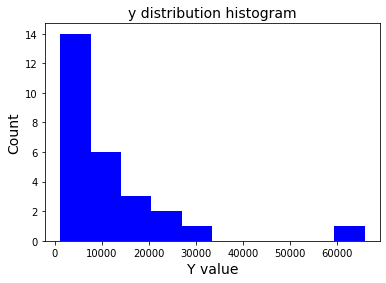

In [26]:
# Plot the y values in a histogram 
"""
The histogram plot will show the y distribution
"""

plt.hist(y, color='blue', bins=10)
plt.title('y distribution histogram', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Y value', fontsize=14)
plt.show()

In [9]:
# Normalazing the y variable

def normalize(y):
    return [(y[n] - min(y)) / (max(y) - 
           min(y)) for n in range(len(y))]

y_nor =  normalize(y)
y_nor

[0.03785233951133998,
 0.0,
 0.08203830999221193,
 0.009498910268916284,
 0.11786123538842672,
 0.009709138463885644,
 0.02836701830601149,
 0.07200056588109148,
 0.061340154113786474,
 0.16997064312953453,
 0.05515749729266751,
 0.0827773739200424,
 0.1147249892162981,
 0.03643321286885736,
 0.047185884734612146,
 0.2845135336695104,
 0.40588219911751927,
 0.14182639117594667,
 0.295619754238469,
 1.0,
 0.2916094621368753,
 0.3074391600336818,
 0.3251664557538743,
 0.06428720301820383,
 0.08530785475783274,
 0.15923792551648586,
 0.11899834447048623]

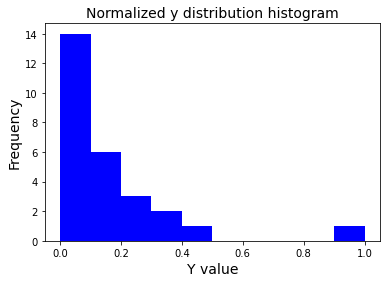

In [32]:
# Verifing the y normalization

plt.hist(y_nor, color='blue', bins=10)
plt.title('Normalized y distribution histogram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Y value', fontsize=14)
plt.show()

In [11]:
# Separating data in training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [12]:
 # Multiple linear regression model 
    
"""
The multiple linear regression (MLR) model will use the parameters:
       
       independent variables (x):
                 x = [I1_inde, I2_inde, I3_inde]
               
       dependent variable (y):
                 y = (I2+I3/I1)
  
 
The model formula is y ~ I1_inde * I2_inde * I3_inde

"""

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [52]:
# Model evaluation

y_pred = model.predict(x_test)

df = pd.DataFrame({'real_values':y_test, 'predicted_value': y_pred})
df

,real_values,predicted_value
9,12170.740134,5678.750654
21,21069.451287,5626.820159
10,4738.572795,7540.236082
15,19585.413112,-4352.234936
26,8871.164545,6966.270859
0,3618.362844,7546.691156
4,8797.556380,6302.489534


In [53]:
# Evaluating the model through the coefficient and the intercept

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 7569.58628551611
Coefficients: 
 [ 9.16178851e-23 -2.37762115e-12  1.66766969e-09]


In [54]:
# Evaluating the model through the R2 score

r2 = r2_score(y_train, model.predict(x_train))
r2

0.8501457194521673

In [55]:
# Evaluating the model through the mean squared error

MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE

126680976.6695588

In [56]:
# Evaluating the model through the residues

y_hat = model.predict(x_train)
res = y_train - y_hat
res

3     -5784.589966
7     -1547.253903
14    -3313.108155
16    12873.252520
25     5429.153487
23    -2184.807834
17     3168.863674
19     -432.397022
18     5699.205300
5     -5770.793918
11     -951.138569
22    -3997.751909
24     -647.398172
13    -4024.943634
1     -6401.166700
6     -4555.050442
20    14007.479248
8     -2372.377897
2      -650.306402
12     1455.130295
dtype: float64

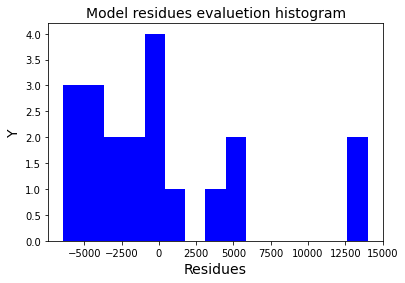

In [57]:
# Histogram plot the residues evaluetion 

plt.hist(res, color='blue', bins=15)
plt.title('Model residues evaluetion histogram', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.xlabel('Residues', fontsize=14)
plt.show()

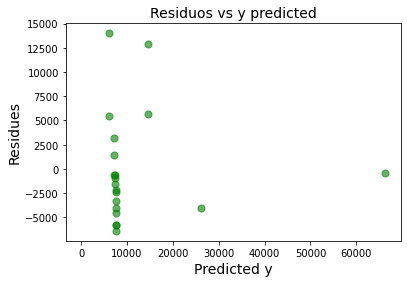

In [58]:
# Plot the residues evaluetion and the predicted values

plt.scatter(y=res, x=y_hat, color='green', s=50, alpha=.6)
plt.title('Residuos vs y predicted', fontsize=14)
plt.hlines(y=0, xmin=-10, xmax=15, color='orange')
plt.ylabel('Residues', fontsize=14)
plt.xlabel('Predicted y', fontsize=14)
plt.show()

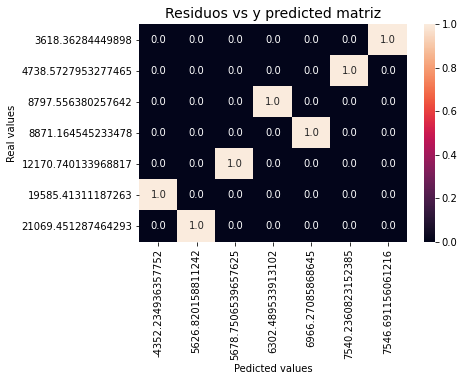

In [59]:
# Evaluating the model through the confusion matrix

corr_df = pd.DataFrame({'real_values':y_test, 'predicted_value': y_pred})
confusion_matrix = pd.crosstab(corr_df['real_values'], corr_df['predicted_value'], 
                               rownames = ['Real values'], colnames=['Pedicted values'])

sn.heatmap(confusion_matrix, annot = True, fmt=".1f")
plt.title('Residuos vs y predicted matriz', fontsize=14)
plt.show()


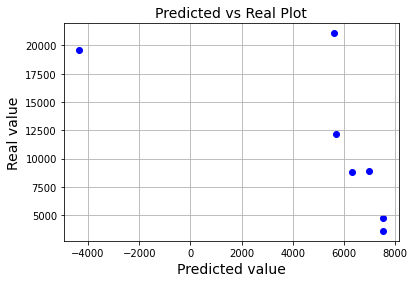

In [60]:
# Plot the predicted values vs true values

plt.scatter(corr_df['predicted_value'], corr_df['real_values'], color='blue')
plt.title('Predicted vs Real Plot', fontsize=14)
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('Real value', fontsize=14)
plt.grid(True)
plt.show()